In [14]:
import os
import csv
import sys
import json
import pandas as pd
import numpy as np

In [2]:
path = 'TCGA-XF-AAN2-01Z-00-DX1.EB523A3A-0DE0-4FFC-9FE7-CF4FB2FB36CF.svs'
file = '8001_4001_4000_4000_0.2527_1-features.csv'

In [3]:
with open(os.path.join(path, file), 'r') as f:
    data = csv.DictReader(f)
    data = [row for row in data]
    data = pd.DataFrame(data)
    # data = data.drop(columns=['Unnamed: 0'])

data.head()

,AreaInPixels,PhysicalSize,Polygon
0,305,305,[11982.0:5626.0:11981.0:5627.0:11981.0:5628.0:...
1,170,170,[11901.0:5667.0:11900.0:5668.0:11899.0:5668.0:...
2,274,274,[11923.0:5659.0:11921.0:5661.0:11921.0:5662.0:...
3,481,481,[11943.0:5669.0:11942.0:5670.0:11941.0:5670.0:...
4,297,297,[11929.0:5668.0:11929.0:5669.0:11928.0:5670.0:...


In [8]:
first_nucleus = data.iloc[0]
correct_area = first_nucleus['AreaInPixels']
polygon_coords = first_nucleus['Polygon']

coords = polygon_coords.strip('[]').split(':')
points = np.array(coords, dtype=float).reshape(-1, 2)

# Check the polygon is closed - Close it if not
if not np.array_equal(points[0], points[-1]):
    points = np.vstack([points, points[0]])


In [9]:
x, y = points[:, 0], points[:, 1]
# Calculate the area using the shoelace formula
area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
print(f"Calculated area: {area}")

Calculated area: 271.5


In [12]:
for i in range(5):
    nucleus = data.iloc[i]

    correct_area = nucleus['AreaInPixels']
    polygon_coords = nucleus['Polygon']

    coords = polygon_coords.strip('[]').split(':')
    points = np.array(coords, dtype=float).reshape(-1, 2)

    # Check the polygon is closed - Close it if not
    if not np.array_equal(points[0], points[-1]):
        points = np.vstack([points, points[0]])

    x, y = points[:, 0], points[:, 1]
    # Calculate the area using the shoelace formula
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

    area = float(area)
    correct_area = float(correct_area)

    print(f"Calculated area: {area}")
    print(f"Correct area: {correct_area}")
    print(f"Difference: {abs(area - correct_area)}")       

Calculated area: 271.5
Correct area: 305.0
Difference: 33.5
Calculated area: 148.0
Correct area: 170.0
Difference: 22.0
Calculated area: 241.5
Correct area: 274.0
Difference: 32.5
Calculated area: 443.5
Correct area: 481.0
Difference: 37.5
Calculated area: 264.0
Correct area: 297.0
Difference: 33.0


(267,)


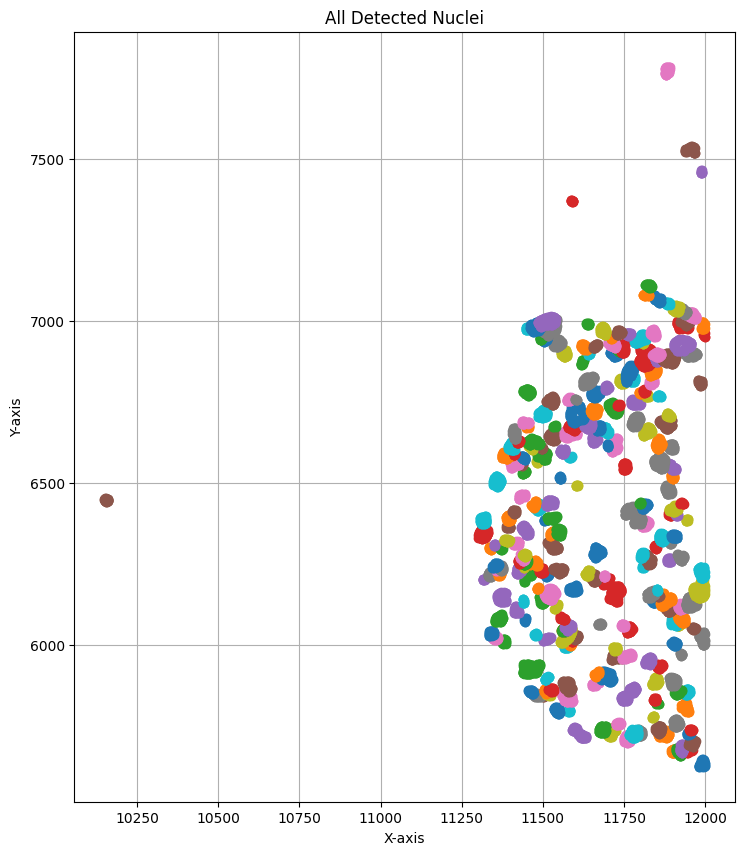

In [21]:
nuclei = []

for i in range(len(data)):
    nucleus = data.iloc[i]

    polygon_coords = nucleus['Polygon']

    coords = polygon_coords.strip('[]').split(':')
    points = np.array(coords, dtype=float).reshape(-1, 2)

    # Check the polygon is closed - Close it if not
    if not np.array_equal(points[0], points[-1]):
        points = np.vstack([points, points[0]])

    nuclei.append(points)

# Convert to numpy array for easier manipulation
nuclei = np.array(nuclei, dtype=object)
print(nuclei.shape)
# Visualize the nuclei
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for nucleus_points in nuclei:
    # Plot each polygon (each nucleus)
    plt.plot(nucleus_points[:, 0], nucleus_points[:, 1], marker='o')
    plt.fill(nucleus_points[:, 0], nucleus_points[:, 1], alpha=0.3)

plt.title('All Detected Nuclei')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()